<a href="https://colab.research.google.com/github/trashchenkov/ecoai24/blob/main/FIRMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Материалы для мастер-класса на EcoAI

## Исследования с использованием FIRMS

[EXPLORING THE USE OF MACHINE LEARNING FOR DAILY FIRE GROWTH
PREDICTION IN ALASKA](https://scholarworks.alaska.edu/bitstream/handle/11122/12576/White_J_2021.pdf?sequence=1&isAllowed=y) (ИЗУЧЕНИЕ ИСПОЛЬЗОВАНИЯ МАШИННОГО ОБУЧЕНИЯ ДЛЯ ЕЖЕДНЕВНОГО ПРОГНОЗИРОВАНИЯ РАЗВИТИЯ ПОЖАРОВ НА АЛЯСКЕ)

Глава 2 диссертации описывает методы, используемые для построения базы данных и анализа в контексте прогнозирования ежедневной активности лесных пожаров. Эта глава охватывает различные аспекты, включая построение базы данных, измерение активности пожара, выбор переменных погоды, условий топлива, климатических индексов, истории пожаров и выбор модели для прогнозирования.

### 2.1 Построение базы данных
Автор начинает с обсуждения важности выбора и форматирования данных для проектов машинного обучения. Подчеркивается риск переобучения и избыточности переменных при включении слишком большого количества переменных, особенно коррелирующих между собой. Для анализа переменные разбиваются на более мелкие подмножества, с особым вниманием к переменным погоды и климата.

### 2.2 Измерение активности пожара
Обсуждается использование продуктов дистанционного зондирования, таких как MODIS и VIIRS, для создания численной меры ежедневной активности пожаров в Аляске. Эти инструменты предоставляют данные о точках активных пожаров, которые, несмотря на возможные помехи от дыма и облаков, предоставляют длительные и непрерывные записи активности пожаров.

### 2.3 Переменные погоды
Исследование использует данные из реанализа ERA5 и оперативные данные станций. Переменные погоды прикрепляются к пожарам, используя среднюю точку обнаружения MODIS для каждого пожара в определенный день.

### 2.4 Условия топлива
Учитываются различные условия топлива и их влияние на поведение пожара, используя систему CFFDRS для описания различных условий топлива и их относительной опасности пожара.

### 2.5 Климатические и погодные индексы
Включаются коротко- и среднесрочные климатические индексы, такие как Североатлантическое колебание, для соединения активности пожаров с глобальными климатическими процессами.

### 2.6 История пожаров
Автор подчеркивает важность включения истории пожаров в прогнозирование, поскольку поведение пожаров накапливается и влияет на их дальнейшее развитие.

### 2.7 Выбор модели
Выбран алгоритм случайного леса из-за его устойчивости к переобучению и способности обрабатывать большое количество переменных. Этот выбор обоснован характеристиками проекта и требованиями к прогнозированию.

### 2.8 Генерация прогнозов
Описывается процесс тренировки модели для прогнозирования активности пожаров, используя наблюдаемые и реанализированные данные о погоде, а также модификация модели для валидации прогнозов на длительные периоды.

### Анализ
Глава демонстрирует глубокий и систематический подход к прогнозированию активности лесных пожаров, начиная от сбора и обработки данных до выбора и применения алгоритмов машинного обучения. Особое внимание уделяется точности, актуальности и обоснованности выбора каждого метода и переменной, что подчеркивает стремление к созданию надежной и эффективной модели прогнозирования. Важным аспектом является учет различных факторов, влияющих на поведение пожаров, включая погодные условия, условия топлива и исторические данные о пожарах, что позволяет модели учитывать множество переменных и предоставлять более точные прогнозы. Выбор алгоритма случайного леса обусловлен его способностью к обработке большого количества взаимосвязанных данных и предотвращению переобучения, делая его идеальным выбором для задач прогнозирования в данном контексте.


# Работа с FIRMS
## Получение ключа доступа
Чтобы воспользоваться данными из сервиса FIRMS, нужно получить бесплатный API-ключ.

Регистрация [здесь](https://firms.modaps.eosdis.nasa.gov/api/map_key).

Ключ имеет лимиты на количество запросов. Лимиты обновляются раз в 10 минут.

Примеры работы с FIRMS API основаны на [ресурсе](https://firms.modaps.eosdis.nasa.gov/academy/).

In [2]:
key = 'MAP_KEY'

Проверим, работает ли API и каков наш "запас" запросов.

In [3]:
import pandas as pd
url = 'https://firms.modaps.eosdis.nasa.gov/mapserver/mapkey_status/?MAP_KEY=' + key
try:
  df = pd.read_json(url,  typ='series')
  display(df)
except:
  # possible error, wrong MAP_KEY value, check for extra quotes, missing letters
  print ("There is an issue with the query. \nTry in your browser: %s" % url)

transaction_limit             1000
current_transactions             0
transaction_interval    10 minutes
dtype: object

In [ ]:
type(df)

pandas.core.series.Series

Посмотрим, какие источники данных нам доступны:

In [ ]:
da_url = 'https://firms.modaps.eosdis.nasa.gov/api/data_availability/csv/' + key + '/all'
df = pd.read_csv(da_url)
display(df)

,data_id,min_date,max_date
0,MODIS_NRT,2023-02-01,2024-02-23
1,MODIS_SP,2000-11-01,2023-01-31
2,VIIRS_NOAA20_NRT,2019-12-04,2024-02-23
3,VIIRS_NOAA21_NRT,2024-01-17,2024-02-23
4,VIIRS_SNPP_NRT,2022-09-01,2024-02-23
5,VIIRS_SNPP_SP,2012-01-20,2022-08-31
6,LANDSAT_NRT,2022-06-20,2024-02-22
7,GOES_NRT,2022-08-09,2024-02-23
8,BA_MODIS,2000-11-01,2023-05-01


`data_id` - идентификатор источника данных;

`min_date` и	`max_date` - временной диапазон доступных данных.

«NRT» означает, что это набор данных в режиме, близком к реальному времени, но он также может включать данные в реальном времени (RT) и сверхреальном времени (URT).

«SP» или стандартная обработка - это информационные продукты, которые представляют собой внутренне непротиворечивые, хорошо откалиброванные данные. Этот набор данных доступен с задержкой в несколько месяцев.

BA_MODIS содержит данные MODIS для выгоревших территорий.

## Краткая справка по представленным источникам данных

MODIS, VIIRS, LANDSAT и GOES — это спутниковые инструменты и программы, каждый из которых выполняет уникальные функции в области наблюдения за Землей. Они играют критически важную роль в мониторинге окружающей среды, изменения климата, управлении природными ресурсами и других научных исследованиях.

### MODIS (Moderate Resolution Imaging Spectroradiometer)

MODIS — это ключевой инструмент на борту спутников Terra (запущен в 1999 году) и Aqua (запущен в 2002 году), управляемых НАСА. Он собирает данные в 36 спектральных полосах, что позволяет получать подробные изображения поверхности Земли в высоком разрешении каждые один-два дня. MODIS используется для мониторинга динамики растительного покрова, концентрации аэрозолей и облаков в атмосфере, температуры поверхности моря и земли, а также за изменениями в снежном покрове и ледниках.

### VIIRS (Visible Infrared Imaging Radiometer Suite)

VIIRS — это инструмент, находящийся на борту спутников Suomi National Polar-orbiting Partnership (Suomi NPP, запущен в 2011 году) и серии Joint Polar Satellite System (JPSS). Он собирает данные в видимом, инфракрасном и ближнем инфракрасном диапазонах, что позволяет наблюдать за погодными условиями, океанами, облаками, аэрозолями, лесными пожарами, снегом и льдом. VIIRS является преемником MODIS, предлагая улучшенное разрешение и качество данных для мониторинга Земли.

### LANDSAT

LANDSAT — это программа долгосрочного наблюдения за Землей, начатая НАСА в 1972 году. На сегодняшний день было запущено несколько спутников LANDSAT, последним из которых является LANDSAT 9, запущенный в 2021 году. Эти спутники предоставляют ценные данные для анализа изменений в землепользовании, сельском хозяйстве, лесном хозяйстве, геологии, водных ресурсах и других аспектах природных и созданных человеком ландшафтов. LANDSAT славится своей способностью предоставлять данные в высоком разрешении на протяжении многих десятилетий, что делает его бесценным инструментом для изучения изменений на поверхности Земли.

### GOES (Geostationary Operational Environmental Satellites)

GOES — это серия геостационарных спутников, управляемых Национальным управлением океанических и атмосферных исследований (NOAA) в сотрудничестве с НАСА. Эти спутники предназначены для мониторинга погодных условий в Северной и Южной Америке и океанах, окружающих эти континенты. GOES обеспечивает непрерывное наблюдение за атмосферными условиями, что критически важно для метеорологического прогнозирования и наблюдения за штормами, ураганами и другими экстремальными погодными условиями.



## Доступные эндпоинты
- area
- countries
- country
- data_availability

Температурные аномалии можно запросить на основе площади, даты и датчика. Для получения дополнительной информации посетите https://firms.modaps.eosdis.nasa.gov/api/area

Эндпоинт ожидает в запросе следующие параметры: [MAP_KEY], [SOURCE], [AREA_COORDINATES],[DAY_RANGE] и опционально  [DATE] для ретроспективных данных

ПРИМЕЧАНИЕ: запрос информации по всему миру от VIIRS может возвращать 30,000 - 100,000+ записей за один день.

In [5]:
# в этом примере мы посмотрим информацию от VIIRS NOAA-20 (вся планета, последний доступный день)
area_url = 'https://firms.modaps.eosdis.nasa.gov/api/area/csv/' + key + '/VIIRS_NOAA20_NRT/world/1'
df_area = pd.read_csv(area_url)
df_area

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,64.64439,24.42866,296.1,0.56,0.43,2020-01-10,12,N20,VIIRS,n,2.0NRT,272.5,1.6,N
1,65.76302,24.18113,331.3,0.39,0.44,2020-01-10,12,N20,VIIRS,n,2.0NRT,265.2,3.6,N
2,65.77042,24.19339,330.6,0.39,0.44,2020-01-10,12,N20,VIIRS,n,2.0NRT,262.2,2.5,N
3,40.75802,29.76031,296.3,0.40,0.45,2020-01-10,18,N20,VIIRS,n,2.0NRT,276.7,0.8,N
4,40.79908,29.37740,307.3,0.39,0.44,2020-01-10,18,N20,VIIRS,n,2.0NRT,276.8,0.9,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604917,-24.98142,27.54643,303.9,0.39,0.36,2020-01-19,2312,N20,VIIRS,n,2.0NRT,289.7,0.7,N
604918,-24.55303,30.14524,295.2,0.40,0.37,2020-01-19,2312,N20,VIIRS,n,2.0NRT,276.7,0.8,N
604919,-19.22289,17.72576,325.0,0.54,0.68,2020-01-19,2312,N20,VIIRS,n,2.0NRT,291.8,8.5,N
604920,-19.22168,17.72052,349.4,0.54,0.68,2020-01-19,2312,N20,VIIRS,n,2.0NRT,289.8,9.9,N


Данные, получаемые из API FIRMS (Fire Information for Resource Management System), предоставляют важную информацию о наблюдениях за огнем с помощью спутников. Каждый столбец в таблице содержит специфические данные, которые помогают пользователям анализировать и интерпретировать информацию о пожарах. Вот подробное описание каждого столбца:

1. **latitude**: Широта местоположения огня. Показывает географическое положение север или юг от экватора.

2. **longitude**: Долгота местоположения огня. Показывает географическое положение восток или запад от Гринвичского меридиана.

3. **bright_ti4**: Яркость теплового излучения в инфракрасном диапазоне, зафиксированная датчиком TIR (Thermal Infrared) в канале 4. Это измерение может служить индикатором интенсивности огня.

4. **scan**: Размер сканирующего пикселя на поверхности Земли. Отражает геометрическое разрешение изображения.

5. **track**: Трек или ширина пройденного пути спутника. Этот параметр также влияет на геометрическое разрешение изображения.

6. **acq_date**: Дата захвата данных. Предоставляется в формате ГГГГ-ММ-ДД.

7. **acq_time**: Время захвата данных в UTC. Предоставляется в формате ЧЧММ.

8. **satellite**: Название спутника, с которого были получены данные.

9. **instrument**: Инструмент на борту спутника, используемый для сбора данных.

10. **confidence**: Уровень уверенности в том, что зарегистрированный сигнал действительно соответствует огню. Это может быть выражено в процентном соотношении или категориях (например, низкий, средний, высокий).

11. **version**: Версия алгоритма обработки данных.

12. **bright_ti5**: Яркость теплового излучения в инфракрасном диапазоне, зафиксированная датчиком TIR в канале 5. Это измерение может давать дополнительную информацию о температуре огня и окружающей среды.

13. **frp**: Излучаемая мощность пожара (Fire Radiative Power) — мера тепловой энергии, испускаемой огнем. Выражается в мегаваттах (МВт) и может служить индикатором интенсивности огня.

14. **daynight**: Показатель времени суток, когда были зафиксированы данные (день или ночь).

Эти параметры играют ключевую роль в анализе и мониторинге пожаров, позволяя пользователям оценивать их распространение, интенсивность и потенциальное воздействие на окружающую среду.

In [8]:
# We can also focus on a smaller area ex. South Asia and get the last 3 days of records
area_url = 'https://firms.modaps.eosdis.nasa.gov/api/area/csv/' + key + '/VIIRS_NOAA20_NRT/54,5.5,102,40/3'
df_area = pd.read_csv(area_url)
df_area

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,23.15084,101.95320,326.51,0.79,0.78,2024-02-26,522,N20,VIIRS,n,2.0NRT,293.08,3.54,D
1,5.52579,100.41441,339.19,0.55,0.43,2024-02-26,658,N20,VIIRS,n,2.0NRT,301.81,3.21,D
2,5.55802,100.38658,337.04,0.55,0.43,2024-02-26,658,N20,VIIRS,n,2.0NRT,303.90,5.01,D
3,5.55804,100.38965,342.98,0.55,0.43,2024-02-26,658,N20,VIIRS,n,2.0NRT,304.32,4.30,D
4,5.56880,100.40829,337.60,0.55,0.43,2024-02-26,658,N20,VIIRS,n,2.0NRT,299.28,2.70,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11215,21.30681,57.79810,303.43,0.52,0.66,2024-02-27,2235,N20,VIIRS,n,2.0NRT,288.42,1.24,N
11216,21.31328,57.74360,299.28,0.51,0.66,2024-02-27,2235,N20,VIIRS,n,2.0NRT,288.17,0.59,N
11217,21.33044,56.69779,312.31,0.44,0.62,2024-02-27,2235,N20,VIIRS,n,2.0NRT,286.93,1.07,N
11218,21.40809,55.74223,304.14,0.38,0.59,2024-02-27,2235,N20,VIIRS,n,2.0NRT,288.00,0.96,N


In [10]:
# извлечем информацию про определенную область (какой-то кусочек в Сибири) за 10 дней от указанной даты
area_url = 'https://firms.modaps.eosdis.nasa.gov/api/area/csv/' + key + '/VIIRS_NOAA20_NRT/100,50,120,65/10/2020-07-10'
df_area = pd.read_csv(area_url)
df_area

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,54.07132,118.42476,330.6,0.61,0.71,2020-07-10,312,N20,VIIRS,n,2.0NRT,292.4,8.4,D
1,54.07234,118.42702,330.1,0.61,0.71,2020-07-10,312,N20,VIIRS,n,2.0NRT,291.6,8.7,D
2,54.13731,118.26830,341.3,0.62,0.71,2020-07-10,312,N20,VIIRS,n,2.0NRT,293.9,6.6,D
3,54.13884,118.27299,342.3,0.62,0.71,2020-07-10,312,N20,VIIRS,n,2.0NRT,293.1,8.2,D
4,62.75044,119.11378,328.8,0.51,0.50,2020-07-10,312,N20,VIIRS,n,2.0NRT,284.5,3.6,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646,59.42595,107.80888,301.2,0.38,0.36,2020-07-19,1912,N20,VIIRS,n,2.0NRT,273.9,0.9,N
4647,59.64057,108.21156,307.3,0.38,0.36,2020-07-19,1912,N20,VIIRS,n,2.0NRT,277.7,0.9,N
4648,60.14918,109.10114,297.3,0.39,0.36,2020-07-19,1912,N20,VIIRS,n,2.0NRT,269.9,0.8,N
4649,58.42057,107.38821,355.6,0.58,0.70,2020-07-19,2054,N20,VIIRS,n,2.0NRT,277.1,8.8,D


## Визуализируем данные

In [11]:
# установим библиотеки
!pip install geodatasets cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 73.8 MB/s eta 0:00:00


In [15]:
!pip install contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 55.7 MB/s eta 0:00:00


In [16]:
import geopandas
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path
import contextily as cx

In [17]:

path = get_path("naturalearth.land")
world = geopandas.read_file(path)

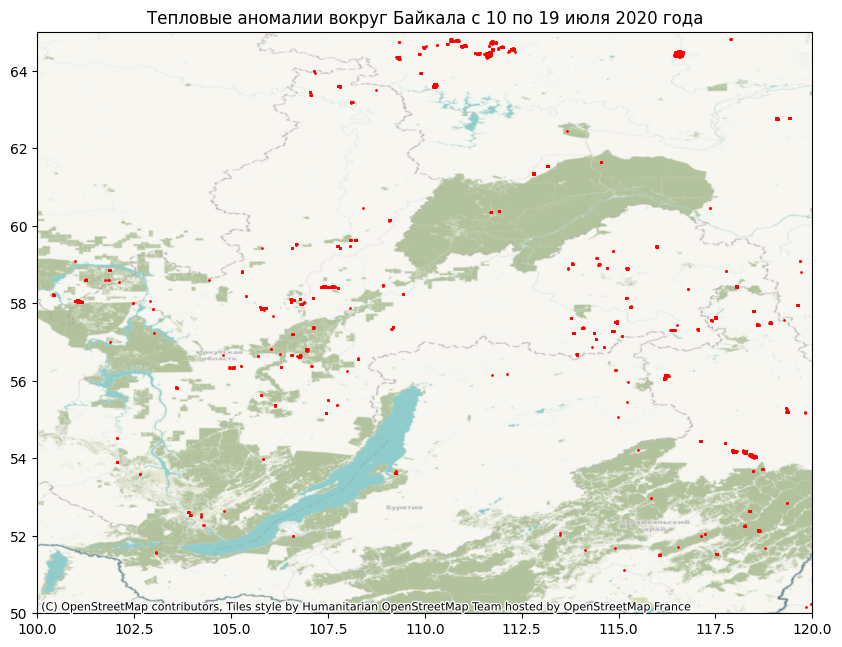

In [23]:
gdf = geopandas.GeoDataFrame(
    df_area, geometry=geopandas.points_from_xy(df_area.longitude, df_area.latitude), crs="EPSG:4326"
)

extent = [100, 50, 120, 65]
ax = world.plot(figsize=(10, 10), alpha=0)
ax.set_xlim([extent[0],  extent[2]])
ax.set_ylim([extent[1],  extent[3]])

ax.set(title='Тепловые аномалии вокруг Байкала с 10 по 19 июля 2020 года')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color="red", markersize=1)
cx.add_basemap(ax, crs=gdf.crs)
plt.show()


## Работа с погодными данными

Есть множество сервисов, предоставляющих данные о погоде. Большинство из них платные. Примером бесплатного сервиса является [Open-Meteo](https://open-meteo.com/en/docs/historical-weather-api).

Он предоставляет исторические погодные данные с 1940 года.
На сайте есть возможность фильтрации и скачивания данных за нужный период и для нужной точки. Также можно скачивать через API, который не требует ключа доступа.

In [24]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.3 MB/s eta 0:00:00


In [25]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 57.5,
	"longitude": 110,
	"start_date": "2020-07-01",
	"end_date": "2020-07-19",
	"hourly": ["temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature", "precipitation", "rain", "snowfall", "snow_depth", "weather_code", "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low", "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration", "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m", "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m", "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm", "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm", "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm", "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_relative_humidity_2m = hourly.Variables(1).ValuesAsNumpy()
hourly_dew_point_2m = hourly.Variables(2).ValuesAsNumpy()
hourly_apparent_temperature = hourly.Variables(3).ValuesAsNumpy()
hourly_precipitation = hourly.Variables(4).ValuesAsNumpy()
hourly_rain = hourly.Variables(5).ValuesAsNumpy()
hourly_snowfall = hourly.Variables(6).ValuesAsNumpy()
hourly_snow_depth = hourly.Variables(7).ValuesAsNumpy()
hourly_weather_code = hourly.Variables(8).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(9).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(10).ValuesAsNumpy()
hourly_cloud_cover = hourly.Variables(11).ValuesAsNumpy()
hourly_cloud_cover_low = hourly.Variables(12).ValuesAsNumpy()
hourly_cloud_cover_mid = hourly.Variables(13).ValuesAsNumpy()
hourly_cloud_cover_high = hourly.Variables(14).ValuesAsNumpy()
hourly_et0_fao_evapotranspiration = hourly.Variables(15).ValuesAsNumpy()
hourly_vapour_pressure_deficit = hourly.Variables(16).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(17).ValuesAsNumpy()
hourly_wind_speed_100m = hourly.Variables(18).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(19).ValuesAsNumpy()
hourly_wind_direction_100m = hourly.Variables(20).ValuesAsNumpy()
hourly_wind_gusts_10m = hourly.Variables(21).ValuesAsNumpy()
hourly_soil_temperature_0_to_7cm = hourly.Variables(22).ValuesAsNumpy()
hourly_soil_temperature_7_to_28cm = hourly.Variables(23).ValuesAsNumpy()
hourly_soil_temperature_28_to_100cm = hourly.Variables(24).ValuesAsNumpy()
hourly_soil_temperature_100_to_255cm = hourly.Variables(25).ValuesAsNumpy()
hourly_soil_moisture_0_to_7cm = hourly.Variables(26).ValuesAsNumpy()
hourly_soil_moisture_7_to_28cm = hourly.Variables(27).ValuesAsNumpy()
hourly_soil_moisture_28_to_100cm = hourly.Variables(28).ValuesAsNumpy()
hourly_soil_moisture_100_to_255cm = hourly.Variables(29).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["relative_humidity_2m"] = hourly_relative_humidity_2m
hourly_data["dew_point_2m"] = hourly_dew_point_2m
hourly_data["apparent_temperature"] = hourly_apparent_temperature
hourly_data["precipitation"] = hourly_precipitation
hourly_data["rain"] = hourly_rain
hourly_data["snowfall"] = hourly_snowfall
hourly_data["snow_depth"] = hourly_snow_depth
hourly_data["weather_code"] = hourly_weather_code
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["cloud_cover"] = hourly_cloud_cover
hourly_data["cloud_cover_low"] = hourly_cloud_cover_low
hourly_data["cloud_cover_mid"] = hourly_cloud_cover_mid
hourly_data["cloud_cover_high"] = hourly_cloud_cover_high
hourly_data["et0_fao_evapotranspiration"] = hourly_et0_fao_evapotranspiration
hourly_data["vapour_pressure_deficit"] = hourly_vapour_pressure_deficit
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_100m"] = hourly_wind_speed_100m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_100m"] = hourly_wind_direction_100m
hourly_data["wind_gusts_10m"] = hourly_wind_gusts_10m
hourly_data["soil_temperature_0_to_7cm"] = hourly_soil_temperature_0_to_7cm
hourly_data["soil_temperature_7_to_28cm"] = hourly_soil_temperature_7_to_28cm
hourly_data["soil_temperature_28_to_100cm"] = hourly_soil_temperature_28_to_100cm
hourly_data["soil_temperature_100_to_255cm"] = hourly_soil_temperature_100_to_255cm
hourly_data["soil_moisture_0_to_7cm"] = hourly_soil_moisture_0_to_7cm
hourly_data["soil_moisture_7_to_28cm"] = hourly_soil_moisture_7_to_28cm
hourly_data["soil_moisture_28_to_100cm"] = hourly_soil_moisture_28_to_100cm
hourly_data["soil_moisture_100_to_255cm"] = hourly_soil_moisture_100_to_255cm

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 57.469242095947266°N 109.85010528564453°E
Elevation 1046.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                         date  temperature_2m  relative_humidity_2m  \
0   2020-07-01 00:00:00+00:00       19.441500             69.159264   
1   2020-07-01 01:00:00+00:00       20.341499             68.003906   
2   2020-07-01 02:00:00+00:00       20.741499             65.705978   
3   2020-07-01 03:00:00+00:00       21.341499             61.106991   
4   2020-07-01 04:00:00+00:00       21.941500             57.765781   
..                        ...             ...                   ...   
451 2020-07-19 19:00:00+00:00        7.491500             87.145416   
452 2020-07-19 20:00:00+00:00        7.341500             88.348404   
453 2020-07-19 21:00:00+00:00        7.341500             89.891304   
454 2020-07-19 22:00:00+00:00        7.691500             89.918114   
455 2020-07-19 23:00:00+00:00        8.041500             89.020874   

     dew_point_2m 

Сервис предоставляет довольно много данных

### Часовые погодные переменные

- **Temperature (2 m)**: Температура воздуха на высоте 2 метра над землей.
- **Relative Humidity (2 m)**: Относительная влажность на высоте 2 метра над землей.
- **Dewpoint (2 m)**: Точка росы на высоте 2 метра над землей, температура, при которой воздух становится насыщенным влагой.
- **Apparent Temperature**: Ощущаемая температура, учитывающая влияние ветра и влажности на восприятие температуры человеком.
- **Precipitation (rain + snow)**: Общее количество осадков, включая дождь и снег.
- **Rain**: Количество дождя.
- **Snowfall**: Количество выпавшего снега.
- **Snow depth**: Глубина снежного покрова.
- **Weather code**: Код погодных условий, который может обозначать ясное небо, облачность, дождь и т.д.
- **Sealevel Pressure**: Давление на уровне моря.
- **Surface Pressure**: Атмосферное давление на поверхности Земли.
- **Cloud cover Total**: Общее облачное покрытие.
- **Cloud cover Low**: Облачное покрытие низкого уровня.
- **Cloud cover Mid**: Облачное покрытие среднего уровня.
- **Cloud cover High**: Облачное покрытие высокого уровня.
- **Reference Evapotranspiration (ETo)**: Справочное значение [эвапотранспирации](https://ru.wikipedia.org/wiki/%D0%AD%D0%B2%D0%B0%D0%BF%D0%BE%D1%82%D1%80%D0%B0%D0%BD%D1%81%D0%BF%D0%B8%D1%80%D0%B0%D1%86%D0%B8%D1%8F), оценка потерь воды из-за испарения и [транспирации](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B0%D0%BD%D1%81%D0%BF%D0%B8%D1%80%D0%B0%D1%86%D0%B8%D1%8F) растений.
- **Vapour Pressure Deficit**: Дефицит давления водяного пара, разница между текущим давлением водяного пара и давлением при насыщении.
- **Wind Speed (10 m)**: Скорость ветра на высоте 10 метров.
- **Wind Speed (100 m)**: Скорость ветра на высоте 100 метров.
- **Wind Direction (10 m)**: Направление ветра на высоте 10 метров.
- **Wind Direction (100 m)**: Направление ветра на высоте 100 метров.
- **Wind Gusts (10 m)**: Порывы ветра на высоте 10 метров.
- **Soil Temperature (0-7 cm)**: Температура почвы на глубине от 0 до 7 см.
- **Soil Temperature (7-28 cm)**: Температура почвы на глубине от 7 до 28 см.
- **Soil Temperature (28-100 cm)**: Температура почвы на глубине от 28 до 100 см.
- **Soil Temperature (100-255 cm)**: Температура почвы на глубине от 100 до 255 см.
- **Soil Moisture (0-7 cm)**: Влажность почвы на глубине от 0 до 7 см.
- **Soil Moisture (7-28 cm)**: Влажность почвы на глубине от 7 до 28 см.
- **Soil Moisture (28-100 cm)**: Влажность почвы на глубине от 28 до 100 см.
- **Soil Moisture (100-255 cm)**: Влажность почвы на глубине от 100 до 255 см.

## Дневные переменные

- **Weather code**: Код, представляющий текущие погодные условия.
- **Maximum Temperature (2 m)**: Максимальная температура воздуха на высоте 2 метра над землей за день.
- **Minimum Temperature (2 m)**: Минимальная температура воздуха на высоте 2 метра над землей за день.
- **Mean Temperature (2 m)**: Средняя температура воздуха на высоте 2 метра над землей за день.
- **Maximum Apparent Temperature (2 m)**: Максимальная ощущаемая температура на высоте 2 метра над землей за день.
- **Minimum Apparent Temperature (2 m)**: Минимальная ощущаемая температура на высоте 2 метра над землей за день.
- **Mean Apparent Temperature (2 m)**: Средняя ощущаемая температура на высоте 2 метра над землей за день.
- **Sunrise**: Время восхода солнца.
- **Sunset**: Время захода солнца.
- **Daylight Duration**: Продолжительность светового дня.
- **Sunshine Duration**: Продолжительность солнечного сияния, то есть количество времени, в течение которого солнце светило в течение дня.
- **Precipitation Sum**: Общее количество осадков за день.
- **Rain Sum**: Общее количество дождя за день.
- **Snowfall Sum**: Общее количество снега за день.
- **Precipitation Hours**: Количество часов, в течение которых выпадали осадки.
- **Maximum Wind Speed (10 m)**: Максимальная скорость ветра на высоте 10 метров за день.
- **Maximum Wind Gusts (10 m)**: Максимальная скорость порывов ветра на высоте 10 метров за день.
- **Dominant Wind Direction (10 m)**: Преобладающее направление ветра на высоте 10 метров за день.
- **Shortwave Radiation Sum**: Суммарное количество коротковолновой радиации за день.
- **Reference Evapotranspiration (ETo)**: Справочное значение эвапотранспирации за день, показатель потери влаги из-за испарения и транспирации.

## Проверим корреляцию погодных величин

<ipython-input-29-e9b7e3ad1d77>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hourly_dataframe.corr()


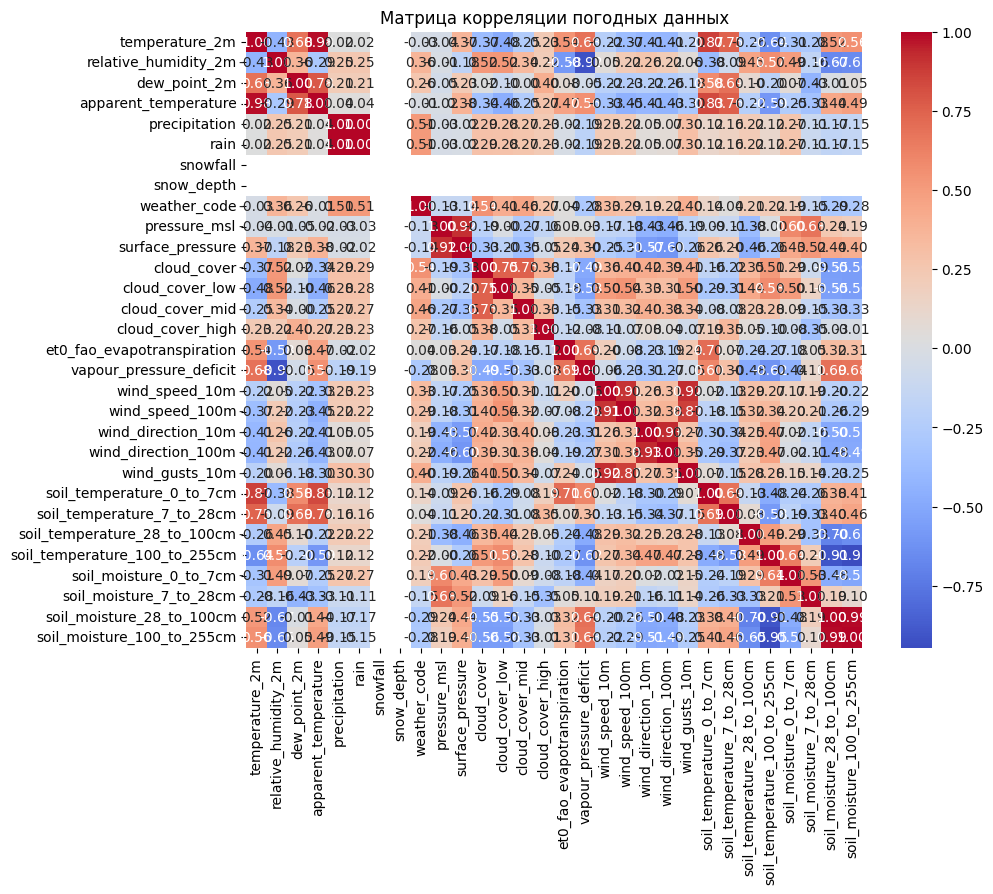

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Расчет корреляционной матрицы
correlation_matrix = hourly_dataframe.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Матрица корреляции погодных данных')
plt.show()

In [30]:
correlation_matrix

,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,pressure_msl,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
temperature_2m,1.000000,-0.429133,0.681455,0.981626,0.019904,0.019904,NaN,NaN,-0.029961,-0.038671,...,-0.411143,-0.201664,0.865558,0.745115,-0.261591,-0.641612,-0.310156,-0.281750,0.521091,0.558300
relative_humidity_2m,-0.429133,1.000000,0.362221,-0.287471,0.250490,0.250490,NaN,NaN,0.364499,-0.012970,...,0.215923,0.059366,-0.384742,-0.088620,0.454664,0.571581,0.493417,-0.164258,-0.670515,-0.653177
dew_point_2m,0.681455,0.362221,1.000000,0.780548,0.211779,0.211779,NaN,NaN,0.258796,-0.050903,...,-0.260505,-0.183206,0.575267,0.693261,0.095039,-0.202249,0.067642,-0.431352,-0.005787,0.049166
apparent_temperature,0.981626,-0.287471,0.780548,1.000000,0.038292,0.038292,NaN,NaN,-0.008144,-0.017547,...,-0.428063,-0.295721,0.834579,0.757545,-0.220507,-0.589086,-0.250406,-0.334316,0.442577,0.486263
precipitation,0.019904,0.250490,0.211779,0.038292,1.000000,1.000000,NaN,NaN,0.507915,-0.033321,...,0.068428,0.304353,0.124172,0.164015,0.217361,0.116788,0.268684,-0.108544,-0.168911,-0.151519
rain,0.019904,0.250490,0.211779,0.038292,1.000000,1.000000,NaN,NaN,0.507915,-0.033321,...,0.068428,0.304353,0.124172,0.164015,0.217361,0.116788,0.268684,-0.108544,-0.168911,-0.151519
snowfall,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
snow_depth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weather_code,-0.029961,0.364499,0.258796,-0.008144,0.507915,0.507915,NaN,NaN,1.000000,-0.132488,...,0.215619,0.403502,0.140120,0.037723,0.207885,0.221337,0.189129,-0.145897,-0.287907,-0.278256
pressure_msl,-0.038671,-0.012970,-0.050903,-0.017547,-0.033321,-0.033321,NaN,NaN,-0.132488,1.000000,...,-0.462032,-0.188367,-0.088509,-0.112806,-0.378624,-0.003111,0.596344,0.677676,0.241211,0.191227


## Сделаем таймлайн пожаров

Пожары происходят не все время. Давайте визуализируем на оси времени моменты появления пожаров.

In [36]:
def convert_time(hhmm):
    cell = str(hhmm)
    if len(cell) == 4:
        return cell[:2] + ':' + cell[2:]
    else:
        # Добавляем ведущий ноль, если час состоит из одной цифры
        return '0' + cell[0] + ':' + cell[1:]

In [37]:
df_area['acq_time'] = df_area['acq_time'].apply(convert_time)
df_area

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
0,54.07132,118.42476,330.6,0.61,0.71,2020-07-10,03:12,N20,VIIRS,n,2.0NRT,292.4,8.4,D
1,54.07234,118.42702,330.1,0.61,0.71,2020-07-10,03:12,N20,VIIRS,n,2.0NRT,291.6,8.7,D
2,54.13731,118.26830,341.3,0.62,0.71,2020-07-10,03:12,N20,VIIRS,n,2.0NRT,293.9,6.6,D
3,54.13884,118.27299,342.3,0.62,0.71,2020-07-10,03:12,N20,VIIRS,n,2.0NRT,293.1,8.2,D
4,62.75044,119.11378,328.8,0.51,0.50,2020-07-10,03:12,N20,VIIRS,n,2.0NRT,284.5,3.6,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4646,59.42595,107.80888,301.2,0.38,0.36,2020-07-19,19:12,N20,VIIRS,n,2.0NRT,273.9,0.9,N
4647,59.64057,108.21156,307.3,0.38,0.36,2020-07-19,19:12,N20,VIIRS,n,2.0NRT,277.7,0.9,N
4648,60.14918,109.10114,297.3,0.39,0.36,2020-07-19,19:12,N20,VIIRS,n,2.0NRT,269.9,0.8,N
4649,58.42057,107.38821,355.6,0.58,0.70,2020-07-19,20:54,N20,VIIRS,n,2.0NRT,277.1,8.8,D


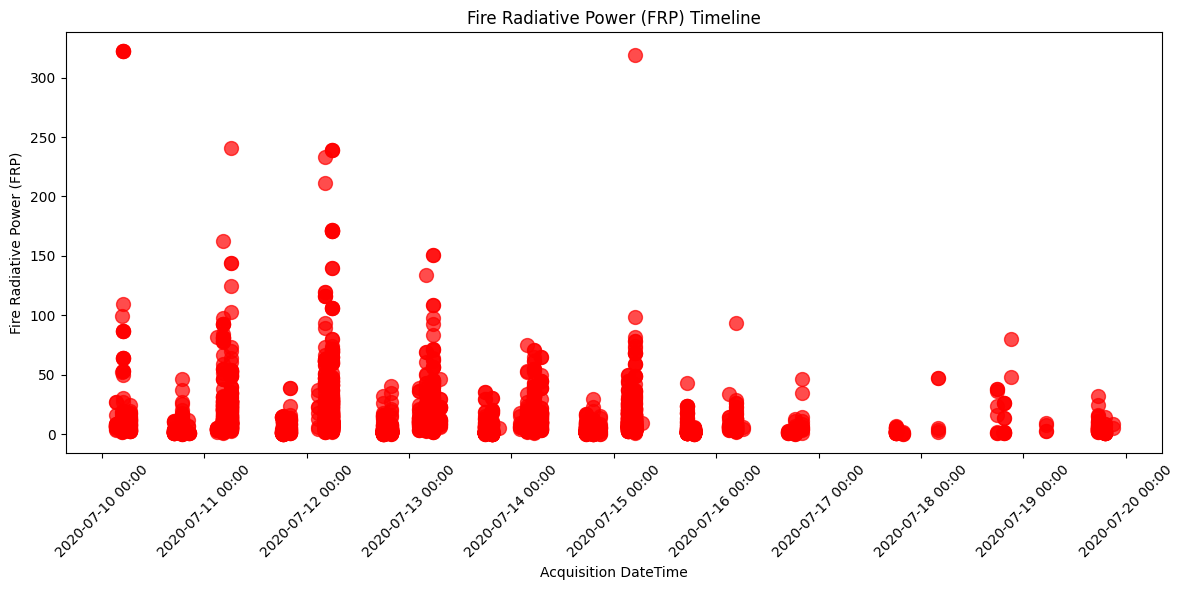

In [38]:
import matplotlib.dates as mdates
df_area['datetime'] = pd.to_datetime(df_area['acq_date'] + ' ' + df_area['acq_time'])

# Сортируем по времени
df_area.sort_values('datetime', inplace=True)

# Построение графика
plt.figure(figsize=(12, 6))
plt.scatter(df_area['datetime'], df_area['frp'], color='red', s=100, alpha=0.7)

# Настройка формата дат на оси X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))

plt.title('Fire Radiative Power (FRP) Timeline')
plt.xlabel('Acquisition DateTime')
plt.ylabel('Fire Radiative Power (FRP)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for the x-axis labels

# Показать график
plt.show()

# Вопросы, которые предстоит решить
- Что использовать в качестве целевой функции? FRP или bright_ti4/bright_ti5.
- Как объединить точки пожаров в один пожар?
- Как поместить пожары и данные о погоде в один масштаб времени?
- Какой масштаб территории выбрать?
- Сколько разных территорий взять в свое исследование?
- Какие погодные факторы влияют на пожары, а какие не стоит брать в расчет?
- Какой времнной лаг между изменениями погоды и появлением пожаров?
- Какие действия по предобработке данных еще надо выполнить? Масштабирование и сэмплирование.
- Какие алгоритмы применить для предсказания?
- Какие метрики использовать для оценки качества модели?

## Библиотеки для работы с временными рядами

**Pandas**: Базовая библиотека для работы с данными, включая временные ряды. Она предоставляет удобные инструменты для манипуляции данными и имеет встроенные функции для ресемплинга, сдвига и оконных операций.

**Statsmodels**: Предоставляет классы и функции для оценки множества различных статистических моделей, а также для проведения статистических тестов и статистических данных. Включает модели ARIMA, сезонные ARIMA (SARIMA) и многие другие.

**Scikit-learn**: Хотя это в первую очередь библиотека машинного обучения, она также может быть использована для анализа временных рядов с использованием алгоритмов, таких как регрессия, классификация и кластеризация.

**Prophet**: Библиотека для прогнозирования временных рядов, которая работает хорошо с ежедневными наблюдениями и обладает хорошей устойчивостью к шуму и отсутствующим данным.

**PyTorch и TensorFlow**: Эти две библиотеки глубокого обучения могут быть использованы для создания сложных моделей временных рядов, таких как рекуррентные нейронные сети (RNN), включая LSTM и GRU, которые хорошо подходят для задач прогнозирования.

**Keras**: Высокоуровневый API для нейронных сетей, работающий поверх TensorFlow, Theano или CNTK, который также можно использовать для создания нейронных сетей для временных рядов.

## Литература по теме временных рядов
1. [11 Classical Time Series Forecasting Methods in Python (Cheat Sheet)](https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/)
2. [Анализ временных рядов](https://habr.com/ru/companies/otus/articles/732080/)
3. [Работа с временными рядами в Python. Часть 1](https://habr.com/ru/companies/mvideo/articles/769190/)

## Примеры кода

Создадим случайные данные, чтобы показать действия, которые нужно выполнить для обучения ИИ.

Предполагается, что данные (FRP и параметры погоды) приведены к одному масштабу.

In [39]:
import numpy as np
import pandas as pd

# Устанавливаем случайное начальное значение для воспроизводимости
np.random.seed(42)

# Генерируем временные ряды для одного месяца с интервалом в один час
date_rng = pd.date_range(start='2024-01-01', end='2024-01-31', freq='H')

# Генерируем случайные погодные данные
# Предположим, что это температура (в градусах Цельсия) и относительная влажность (в процентах)
temperature = np.random.uniform(low=-5, high=30, size=(len(date_rng),))
humidity = np.random.uniform(low=20, high=100, size=(len(date_rng),))

# Генерируем данные FRP, присваиваем высокие значения случайным событиям, чтобы имитировать пожары
# Большинство значений FRP будут нулями, что означает отсутствие пожаров
frp = np.random.choice([0, 0, 0, 0, 0, 50, 100, 150], size=(len(date_rng),))

# Создаем DataFrame
weather_frp_df = pd.DataFrame({
    'DateTime': date_rng,
    'Temperature': temperature,
    'Humidity': humidity,
    'FRP': frp
})

# Устанавливаем DateTime в качестве индекса
weather_frp_df.set_index('DateTime', inplace=True)

# Сохраняем данные в CSV-файл
file_path = 'weather_frp_data.csv'
weather_frp_df.to_csv(file_path)




In [40]:
weather_frp_df

,Temperature,Humidity,FRP
DateTime,,,
2024-01-01 00:00:00,8.108904,34.498645,150
2024-01-01 01:00:00,28.275001,25.319701,0
2024-01-01 02:00:00,20.619788,79.289652,150
2024-01-01 03:00:00,15.953047,65.957849,50
2024-01-01 04:00:00,0.460652,87.346302,0
...,...,...,...
2024-01-30 20:00:00,24.071679,76.374461,0
2024-01-30 21:00:00,28.775942,36.148276,0
2024-01-30 22:00:00,-0.649597,73.874595,0


Как правило, связь между предсказываемой величиной (FRP в этом примере) и признаками (погодные условия) идет не час в час, а с некоторым лагом. Давайте это проанализируем.

In [47]:
# Допустим, у нас есть DataFrame с колонками 'Temperature', 'Humidity' и 'FRP'
window_size = 3  # Размер окна для лагов

# Создаем лаговые признаки
for lag in range(1, window_size + 1):
    weather_frp_df[f'Temperature_lag_{lag}'] = weather_frp_df['Temperature'].shift(lag)
    weather_frp_df[f'Humidity_lag_{lag}'] = weather_frp_df['Humidity'].shift(lag)
    # Предполагаем, что FRP - это наша целевая переменная, поэтому лаги для нее не создаем

weather_frp_df.dropna(inplace=True)  # Удаляем строки с пропущенными значениями после сдвига


Мы создали отдельные столбцы, где каждый последующий отстает на один от предыдущего.

In [48]:
weather_frp_df

,Temperature,Humidity,FRP,Temperature_lag_1,Humidity_lag_1,Temperature_lag_2,Humidity_lag_2,Temperature_lag_3,Humidity_lag_3
DateTime,,,,,,,,,
2024-01-01 03:00:00,15.953047,65.957849,50,20.619788,79.289652,28.275001,25.319701,8.108904,34.498645
2024-01-01 04:00:00,0.460652,87.346302,0,15.953047,65.957849,20.619788,79.289652,28.275001,25.319701
2024-01-01 05:00:00,0.459808,31.181790,100,0.460652,87.346302,15.953047,65.957849,20.619788,79.289652
2024-01-01 06:00:00,-2.967074,83.621385,50,0.459808,31.181790,0.460652,87.346302,15.953047,65.957849
2024-01-01 07:00:00,25.316165,36.130186,100,-2.967074,83.621385,0.459808,31.181790,0.460652,87.346302
...,...,...,...,...,...,...,...,...,...
2024-01-30 20:00:00,24.071679,76.374461,0,27.533520,44.634395,7.210389,22.397887,9.414432,31.172100
2024-01-30 21:00:00,28.775942,36.148276,0,24.071679,76.374461,27.533520,44.634395,7.210389,22.397887
2024-01-30 22:00:00,-0.649597,73.874595,0,28.775942,36.148276,24.071679,76.374461,27.533520,44.634395


Определим теперь корреляцию.

In [49]:
correlation_matrix_new_lags = weather_frp_df.corr()
correlation_matrix_new_lags

,Temperature,Humidity,FRP,Temperature_lag_1,Humidity_lag_1,Temperature_lag_2,Humidity_lag_2,Temperature_lag_3,Humidity_lag_3
Temperature,1.000000,-0.066345,0.009012,0.076929,0.029749,-0.005770,0.064455,-0.007867,0.004749
Humidity,-0.066345,1.000000,0.011228,0.019302,-0.055281,-0.009117,0.011623,0.008431,0.002506
FRP,0.009012,0.011228,1.000000,-0.069866,0.031912,-0.015966,0.035263,-0.009558,-0.032237
Temperature_lag_1,0.076929,0.019302,-0.069866,1.000000,-0.062643,0.076978,0.024769,-0.003605,0.062029
Humidity_lag_1,0.029749,-0.055281,0.031912,-0.062643,1.000000,0.022609,-0.053944,-0.012009,0.011530
Temperature_lag_2,-0.005770,-0.009117,-0.015966,0.076978,0.022609,1.000000,-0.067563,0.077492,0.021722
Humidity_lag_2,0.064455,0.011623,0.035263,0.024769,-0.053944,-0.067563,1.000000,0.026247,-0.052995
Temperature_lag_3,-0.007867,0.008431,-0.009558,-0.003605,-0.012009,0.077492,0.026247,1.000000,-0.065955
Humidity_lag_3,0.004749,0.002506,-0.032237,0.062029,0.011530,0.021722,-0.052995,-0.065955,1.000000


Предположим, что анализ показал корреляцию с лагом 3.

In [50]:
df3 = weather_frp_df[['Humidity_lag_3', 'Temperature_lag_3', 'FRP']]

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

# Инициализируем MinMaxScaler
scalerx = MinMaxScaler()
scalery = MinMaxScaler()

# Выделяем признаки и целевую функцию
X = df3.drop('FRP', axis=1)
y = df3['FRP'].values
# меняем масштаб признаков и целевой функции
X_scaled = scalerx.fit_transform(X)
y_scaled = scalery.fit_transform(y.reshape(-1, 1))

# Разделяем на
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)


GradientBoostingRegressor()

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}, R²: {r2}")

MSE: 0.1470480406081035, R²: -0.053543209860515306
